First we need to import the libraries we will be using

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we need to import our training data

In [4]:
train = pd.read_csv('train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.shape

(4209, 378)

In [78]:
dtype = train.dtypes.reset_index()
dtype.columns = ["Column", "Column Type",]
dtype.groupby("Column Type").count().reset_index()

,Column Type,Column
0,int64,369
1,float64,1
2,object,8


In [90]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


As you cans see, we have a very large number of features. While there are a few features that are categorical, the majority of them are binary. Our number of samples is quite small when compared to the number of features, so it might be necessary to reduce the dimensionality of our data before we can make predictions on it. Reducing the dimensionality will allow us to train our data quickly/more efficiently, and ensure we do not overfity. When reducing the dimensionality, we will have to be careful and ensure we keep the features with the max. variance, to minimize the loss of information. 

Before we dive in to the dimensionality reduction, we need to explore and visualize our data

First, we'll take a look at our y variable

In [14]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

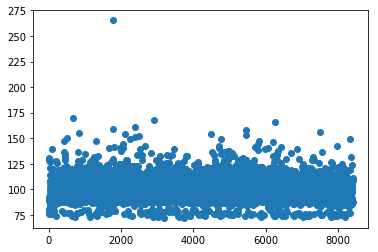

In [13]:
plt.scatter(x=train['ID'],y=train['y'])

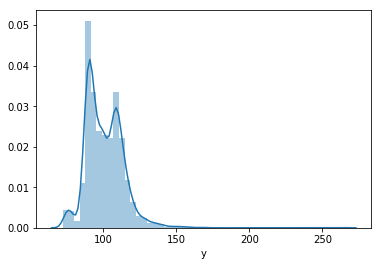

In [159]:
sns.distplot(train['y'],bins=50,hist=True)

We can see that almost all our samples pass testing in between 75-125 seconds. We also have one sample (outlier) that took considerably longer to pass testing than the others, which we will remove

In [170]:
train = train[train['y']<200]

We will now check to see if we have any missing values in our data

In [182]:
nullData = train.isnull().sum()
nullData.sum()

0

We do not have any missing values!

In [192]:
train.iloc[:,2:10]
for col in train.iloc[:,2:10]:
    print(train.iloc[:,2:10][col].value_counts())

z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     250
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
ab      3
q       3
d       3
Name: X1, dtype: int64
as    1659
ae     496
ai     414
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z    

"X4" has only 4 variables and almost all of them are "d", probably not helpful in predicting the value of "y". The remaining categorical variables have a more even split. 

cardinality of each categorical variable (want to plot the data above to visualize it):

Now I want to see the relatioinship between our target variable and the categorical variables using violin plots. I also want to visualize the  between our binary variables using a heatmap.

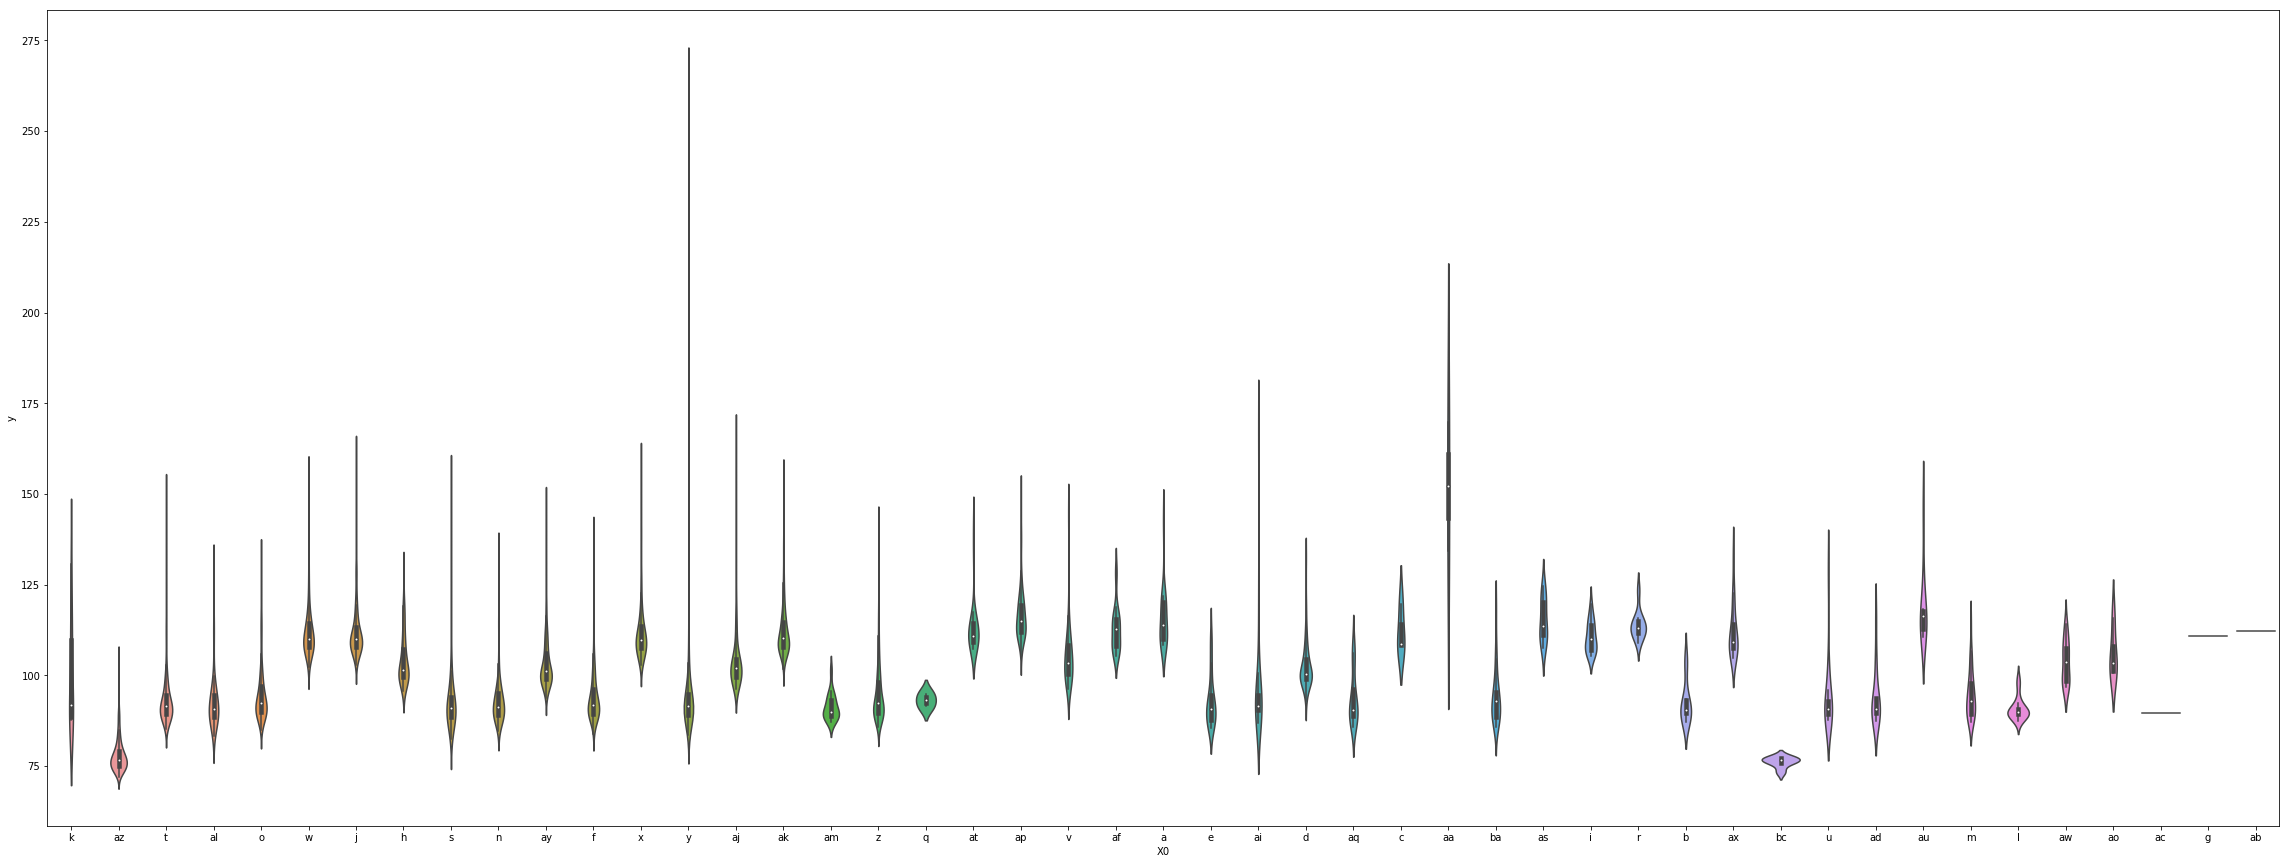

In [242]:
plt.figure(figsize=(40,15))
sns.violinplot(x='X0',y='y',data=train)

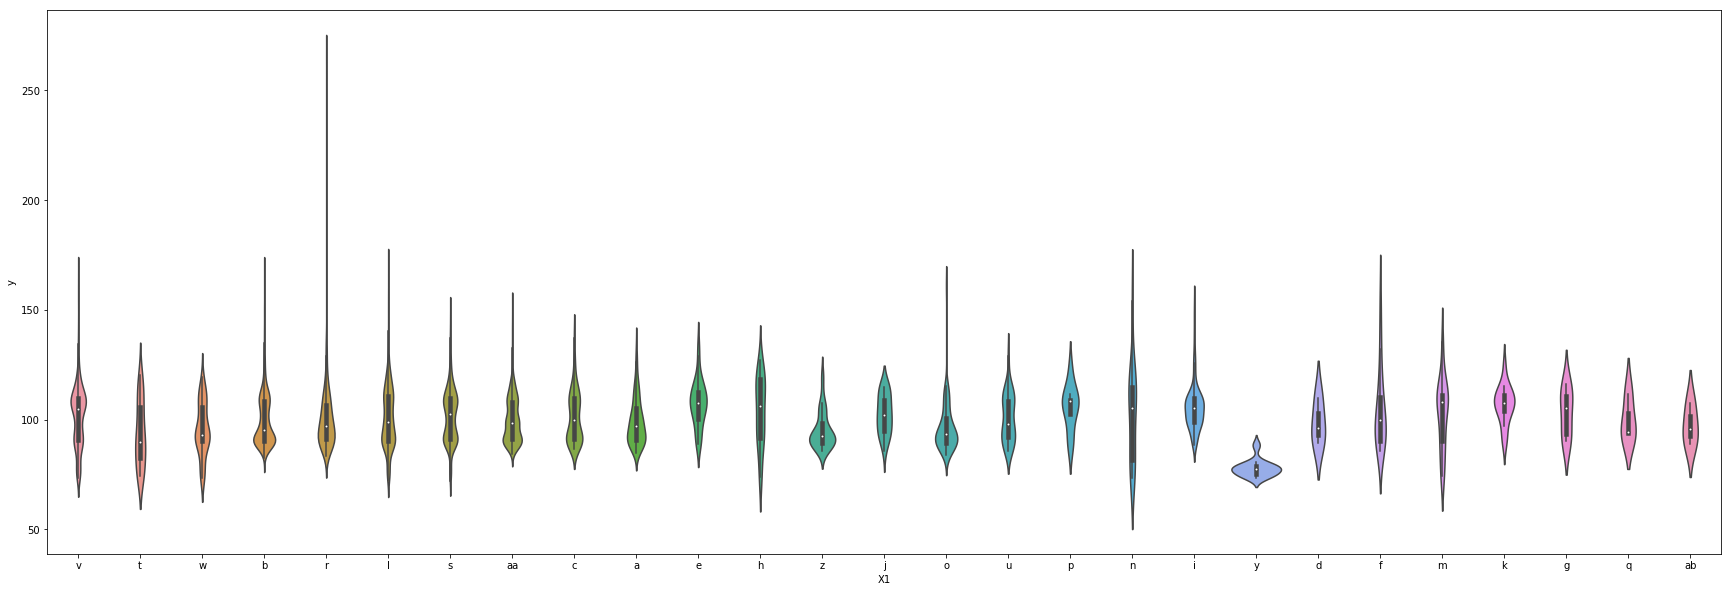

In [239]:
plt.figure(figsize=(30,10))
sns.violinplot(x='X1',y='y',data=train)

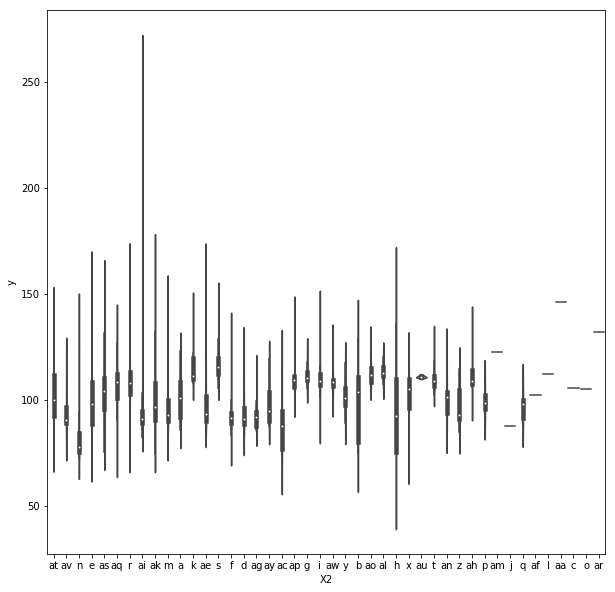

In [243]:
plt.figure(figsize=(10,10))
sns.violinplot(x='X2',y='y',data=train)

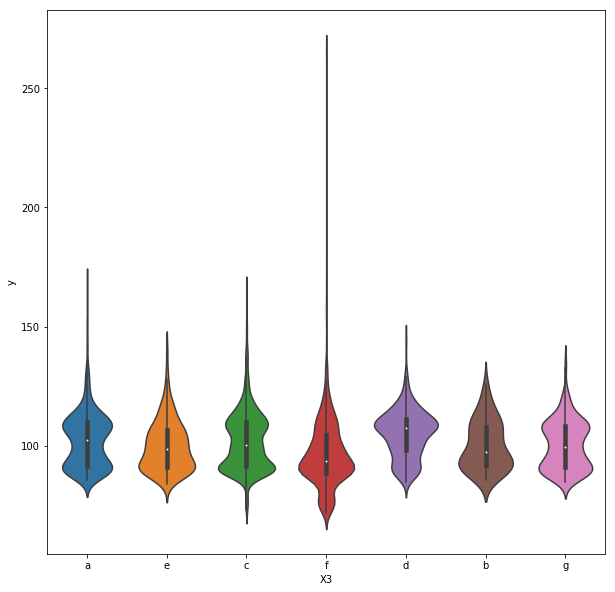

In [234]:
plt.figure(figsize=(10,10))
sns.violinplot(x='X3',y='y',data=train)

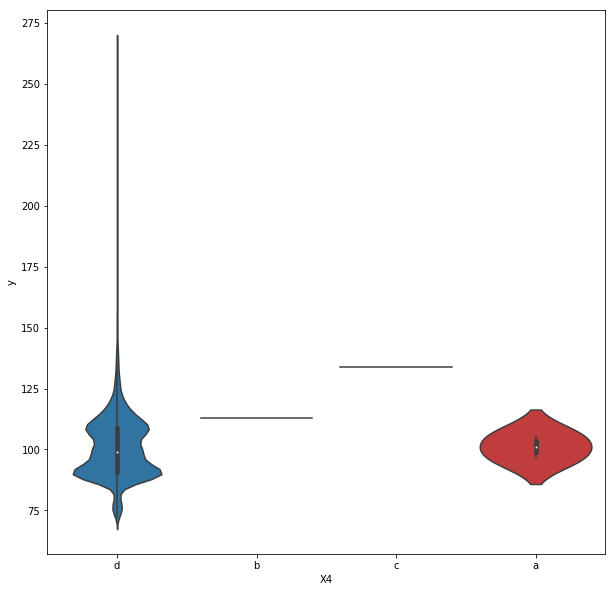

In [244]:
plt.figure(figsize=(10,10))
sns.violinplot(x='X4',y='y',data=train)

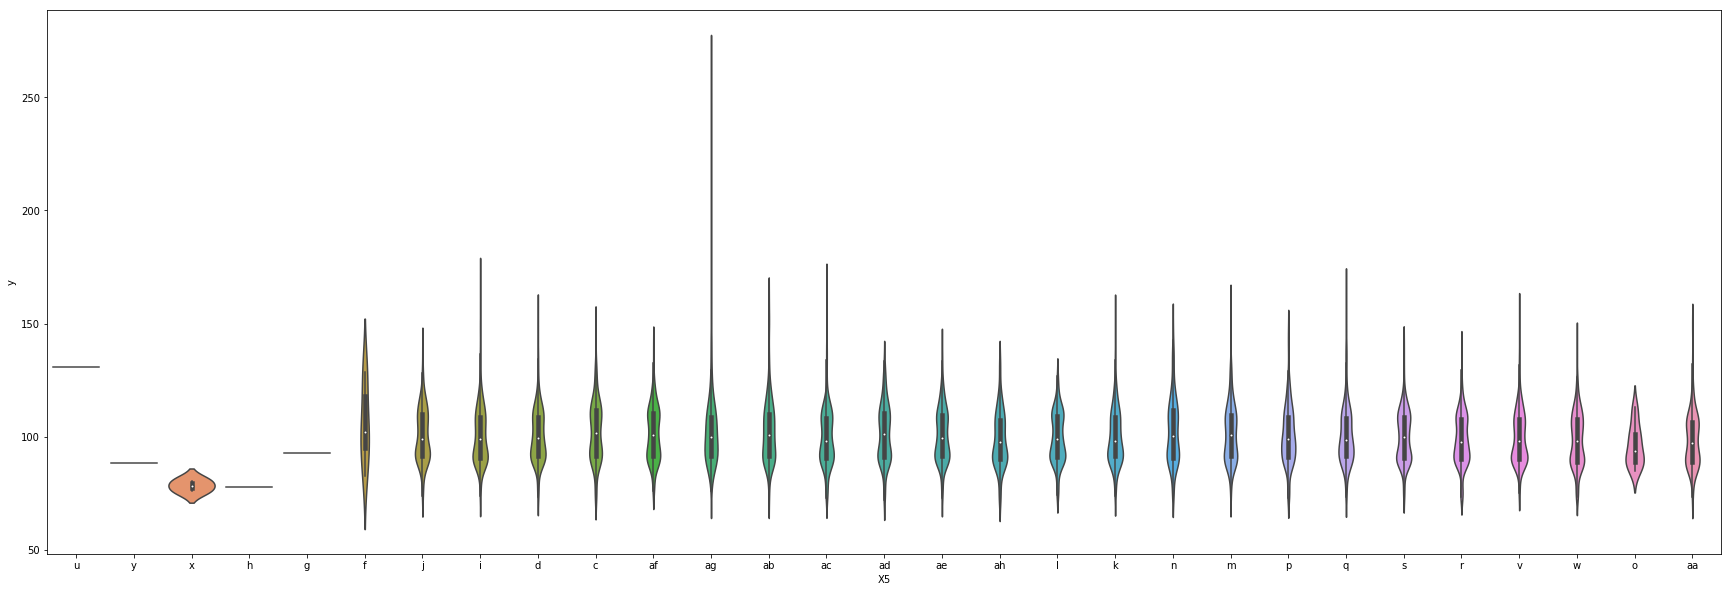

In [246]:
plt.figure(figsize=(30,10))
sns.violinplot(x='X5',y='y',data=train)

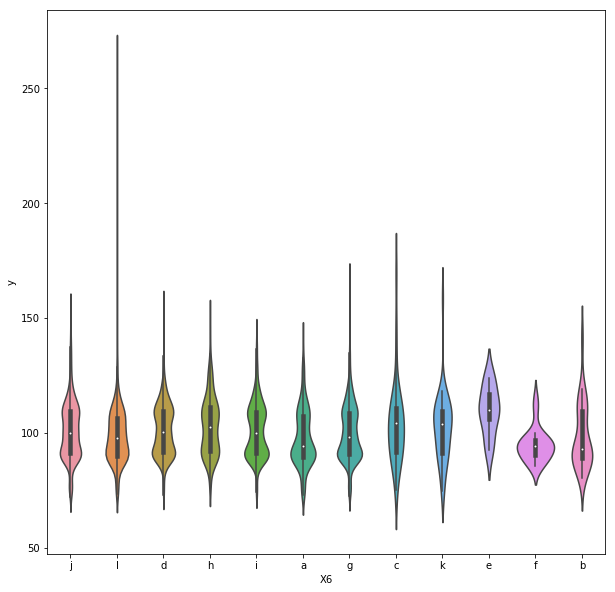

In [247]:
plt.figure(figsize=(10,10))
sns.violinplot(x='X6',y='y',data=train)

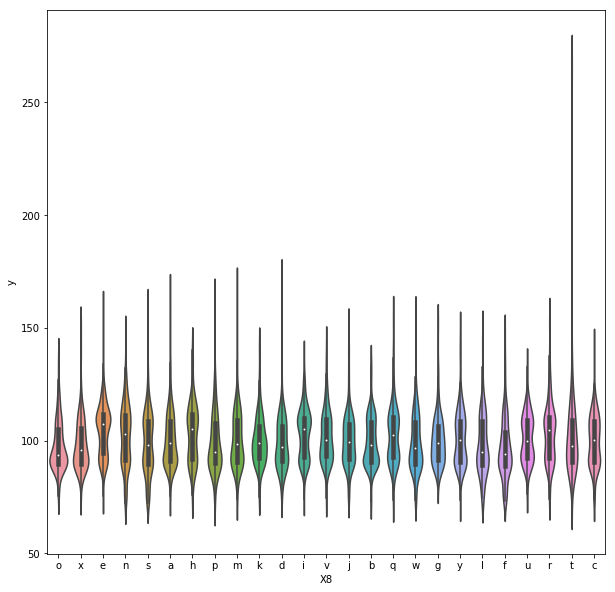

In [248]:
plt.figure(figsize=(10,10))
sns.violinplot(x='X8',y='y',data=train)

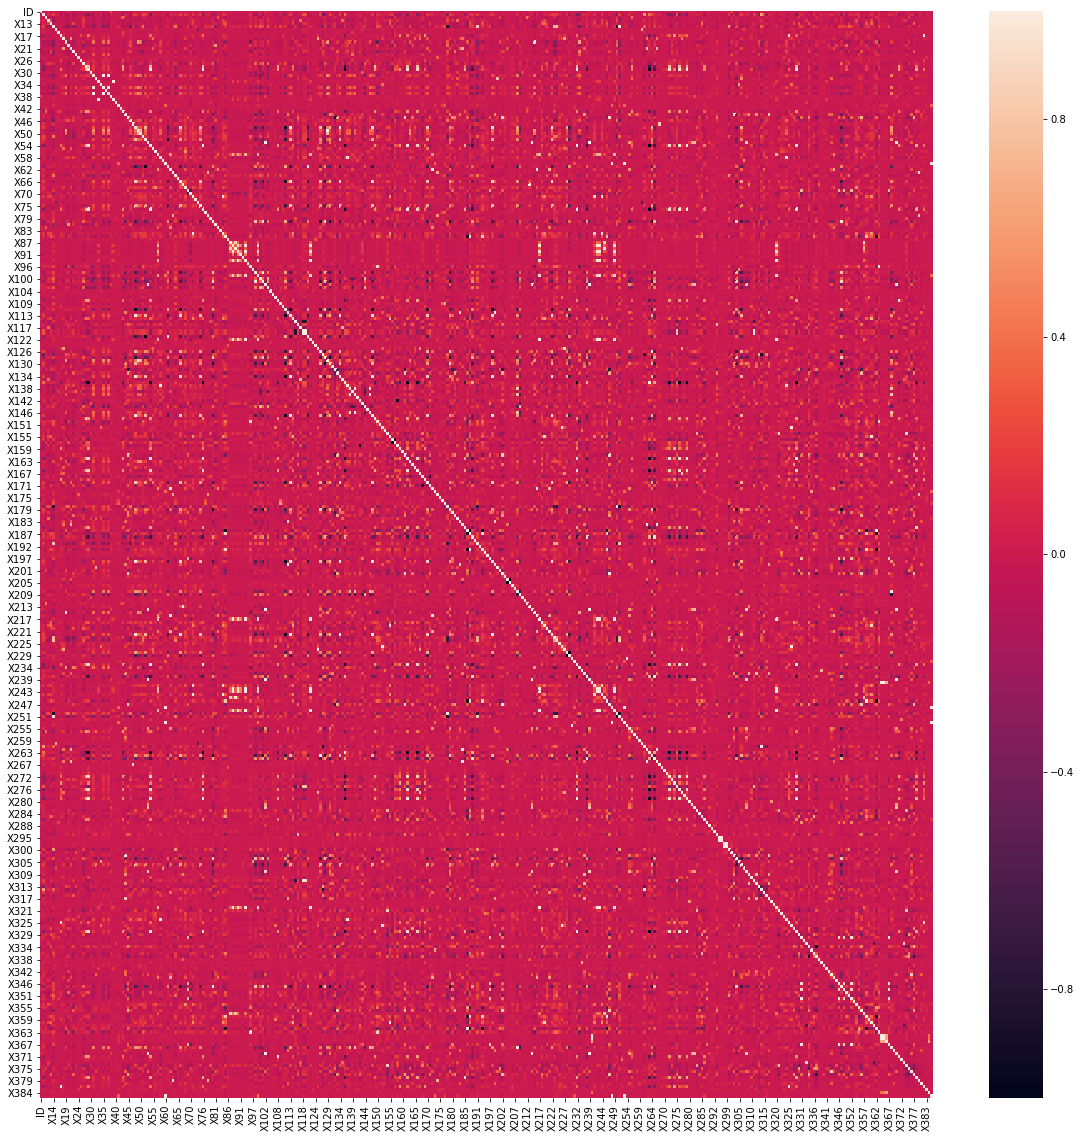

In [224]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

It's quite difficult to see the specific correlations due to the large number of features, but we can see from the general red-ish color of our heatmap that most of data is uncorrelated, or has very little correlation. (What are the implications?)

Now I will check if there are any categories that have only one value, and drop them as they have no descriptive value

In [6]:
nullData = []
for col in train:
    if train[col].nunique() == 1:
        nullData.append(col)

nullData

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [7]:
train = train.drop(nullData,axis=1)

In [8]:
train.shape

(4209, 366)

We must now convert our categorical variables into numbers so our model can understand them. We will do this using one-hot encoding. One-hot encoding is a process in which categorical features are represented using numerous binary features.Although this will significantly increase our dimensionality, it is necessary.

In [9]:
train['X0'] = pd.Categorical(train['X0'])
train['X1'] = pd.Categorical(train['X1'])
train['X2'] = pd.Categorical(train['X2'])
train['X3'] = pd.Categorical(train['X3'])
train['X4'] = pd.Categorical(train['X4'])
train['X5'] = pd.Categorical(train['X5'])
train['X6'] = pd.Categorical(train['X6'])
train['X8'] = pd.Categorical(train['X8'])

In [10]:
pdX0 = pd.get_dummies(train['X0'], prefix='X0')
pdX1 = pd.get_dummies(train['X1'], prefix='X1')
pdX2 = pd.get_dummies(train['X2'], prefix='X2')
pdX3 = pd.get_dummies(train['X3'], prefix='X3')
pdX4 = pd.get_dummies(train['X4'], prefix='X4')
pdX5 = pd.get_dummies(train['X5'], prefix='X5')
pdX6 = pd.get_dummies(train['X6'], prefix='X6')
pdX8 = pd.get_dummies(train['X8'], prefix='X8')

In [11]:
train = pd.concat([pdX0,pdX1,pdX2,pdX3,pdX4,pdX5,pdX6,pdX8,train],axis=1)

In [12]:
train.shape

(4209, 561)

Now that we have completed one-hot encoding, we must remove our categorical features.

In [16]:
train2 = train.drop(['X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)
train2.shape

(4209, 553)

Now I have finished preprocessing and data exploration, we can begin training our model. 

In [19]:
X_train = train2.drop('y',axis=1)
y_train = train2['y']

In [21]:
X_train.shape

(4209, 552)

*NEED TO MOVE ID COLUMN TO THE FRONT*

Now we will import our test data

In [87]:
f = list(X_train.columns.values)

In [88]:
f

['X0_a',
 'X0_aa',
 'X0_ab',
 'X0_ac',
 'X0_ad',
 'X0_af',
 'X0_ai',
 'X0_aj',
 'X0_ak',
 'X0_al',
 'X0_am',
 'X0_ao',
 'X0_ap',
 'X0_aq',
 'X0_as',
 'X0_at',
 'X0_au',
 'X0_aw',
 'X0_ax',
 'X0_ay',
 'X0_az',
 'X0_b',
 'X0_ba',
 'X0_bc',
 'X0_c',
 'X0_d',
 'X0_e',
 'X0_f',
 'X0_g',
 'X0_h',
 'X0_i',
 'X0_j',
 'X0_k',
 'X0_l',
 'X0_m',
 'X0_n',
 'X0_o',
 'X0_q',
 'X0_r',
 'X0_s',
 'X0_t',
 'X0_u',
 'X0_v',
 'X0_w',
 'X0_x',
 'X0_y',
 'X0_z',
 'X1_a',
 'X1_aa',
 'X1_ab',
 'X1_b',
 'X1_c',
 'X1_d',
 'X1_e',
 'X1_f',
 'X1_g',
 'X1_h',
 'X1_i',
 'X1_j',
 'X1_k',
 'X1_l',
 'X1_m',
 'X1_n',
 'X1_o',
 'X1_p',
 'X1_q',
 'X1_r',
 'X1_s',
 'X1_t',
 'X1_u',
 'X1_v',
 'X1_w',
 'X1_y',
 'X1_z',
 'X2_a',
 'X2_aa',
 'X2_ac',
 'X2_ae',
 'X2_af',
 'X2_ag',
 'X2_ah',
 'X2_ai',
 'X2_ak',
 'X2_al',
 'X2_am',
 'X2_an',
 'X2_ao',
 'X2_ap',
 'X2_aq',
 'X2_ar',
 'X2_as',
 'X2_at',
 'X2_au',
 'X2_av',
 'X2_aw',
 'X2_ay',
 'X2_b',
 'X2_c',
 'X2_d',
 'X2_e',
 'X2_f',
 'X2_g',
 'X2_h',
 'X2_i',
 'X2_j',
 'X2_k',
 

In [93]:
test = pd.read_csv('test.csv')
test.shape

(4209, 377)

We have to change the test data to match the format of the train data

In [94]:
test = test.drop(nullData,axis=1)
test.shape

(4209, 365)

In [95]:
test['X0'] = pd.Categorical(test['X0'])
test['X1'] = pd.Categorical(test['X1'])
test['X2'] = pd.Categorical(test['X2'])
test['X3'] = pd.Categorical(test['X3'])
test['X4'] = pd.Categorical(test['X4'])
test['X5'] = pd.Categorical(test['X5'])
test['X6'] = pd.Categorical(test['X6'])
test['X8'] = pd.Categorical(test['X8'])

In [96]:
pdtX0 = pd.get_dummies(test['X0'], prefix='X0')
pdtX1 = pd.get_dummies(test['X1'], prefix='X1')
pdtX2 = pd.get_dummies(test['X2'], prefix='X2')
pdtX3 = pd.get_dummies(test['X3'], prefix='X3')
pdtX4 = pd.get_dummies(test['X4'], prefix='X4')
pdtX5 = pd.get_dummies(test['X5'], prefix='X5')
pdtX6 = pd.get_dummies(test['X6'], prefix='X6')
pdtX8 = pd.get_dummies(test['X8'], prefix='X8')

In [97]:
test = pd.concat([pdtX0,pdtX1,pdtX2,pdtX3,pdtX4,pdtX5,pdtX6,pdtX8,test],axis=1)

In [98]:
test.shape

(4209, 566)

We don't have the same number of features as the training set. I suspect it is because some of the categorical features don't exist in the test set. We will have to find out if this is the case, and fix it. 

This is the list of features that are in X_train but not in X_test: ['X2_aa' 'X2_ar' 'X2_c' 'X2_l' 'X2_o' 'X5_u']. We will drop these features from our test set for compatibility. 

This is the list of features that are in X_test but not in X_train: ['X0_ae' 'X0_ag' 'X0_an' 'X0_av' 'X0_bb' 'X0_p' 'X2_ab' 'X2_ad' 'X2_aj'\n 'X2_ax' 'X2_u' 'X2_w' 'X5_a' 'X5_b' 'X5_t' 'X5_z' 'X0' 'X1' 'X2' 'X3'\n 'X4' 'X5' 'X6' 'X8']. We must also drop these features from our test set for compatibility. 

In [110]:
X_test = test.drop( ["X0_ae","X0_ag","X0_an","X0_av","X0_bb","X0_p","X2_ab","X2_ad","X2_aj","X2_ax","X2_u","X2_w","X5_a","X5_b","X5_t","X5_z","X0","X1","X2","X3","X4","X5","X6","X8"],axis=1)

In [105]:
X_train = X_train.drop(["X2_aa","X2_ar","X2_c","X2_l","X2_o","X5_u"],axis=1)

In [106]:
X_train.shape

(4209, 546)

In [111]:
X_test.shape

(4209, 542)

We still don't have a matching number of features for some reason. We will fix this now.

In [119]:
testft2 = list(X_test.columns.values)

In [121]:
X_train = X_train[testft2]

In [122]:
X_train.shape

(4209, 542)

We now finally have compatible train and test data! 

In [129]:
print(X_train.columns.get_loc("ID"))
print(X_test.columns.get_loc("ID"))

185
185


One last thing before we begin training our model. I will remove the ID columns as they don't have any physical significance and will confuse our model. I will store the ID's as they will be used to identify our prediction/test results.

Now, we are finally done with preprocessing, we can begin training our model!

In [130]:
trainID = X_train.pop("ID")
testID = X_test.pop("ID")

In [160]:
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import KFold

In [136]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)
#Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   #normalize=False, positive=False, precompute=False, random_state=None,
   #selection='cyclic', tol=0.0001, warm_start=False)
y_pred = reg.predict(X_test)

In [146]:
yp = pd.Series(y_pred)

In [149]:
testID = pd.Series(testID)

In [152]:
y_sub = pd.DataFrame()

In [158]:
y_sub = pd.concat([testID,yp],axis=1)

In [161]:
y_sub.head()

,ID,0
0,1,80.370236
1,2,95.312179
2,3,80.485879
3,4,80.084967
4,5,110.443382


In [164]:
y_subxl = y_sub.to_csv('submission1.csv')

Our first submission recieved a score of 0.53915